In [11]:
import pandas as pd
## read csv files
movies_file_path = '/Users/akshandua/Downloads/ml-20m/movies.csv'
ratings_file_path = '/Users/akshandua/Downloads/ml-20m/ratings.csv'

movies_df = pd.read_csv(movies_file_path)
ratings_df = pd.read_csv(ratings_file_path)

## print columns
print(movies_df.columns)
print(ratings_df.columns)

## print lenth
print(len(movies_df))
print(len(ratings_df))

## fix genres and one hot encode
genres_oneHotEncode = movies_df['genres'].str.get_dummies(sep='|')

## add to one hot encoding back to movies
movies_with_genres_df = pd.concat([movies_df, genres_oneHotEncode], axis=1)

movies_with_genres_df = movies_with_genres_df.rename(columns={'(no genres listed)': 'Others'})

others_column = movies_with_genres_df.pop('Others')
movies_with_genres_df['Others'] = others_column

print(movies_with_genres_df.columns)


## merge movies into ratings

combined_df = pd.merge(ratings_df, movies_with_genres_df, on='movieId', how='inner')

print(combined_df.columns)
print(len(combined_df))


## According to README file provided:
## Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'], unit='s').dt.date
print(combined_df[['timestamp']].head())

combined_df.head(5000).to_csv("/Users/akshandua/Downloads/ml-20m/cleaned_data_sample.csv", index=False)

combined_df.sample(5000)


Index(['movieId', 'title', 'genres'], dtype='object')
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
27278
20000263
Index(['movieId', 'title', 'genres', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'Others'],
      dtype='object')
Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'Others'],
      dtype='object')
20000263
    timestamp
0  2005-04-02
1  2005-04-02
2  2005-04-02
3  2005-04-02
4  2005-04-02


,userId,movieId,rating,timestamp,title,genres,Action,Adventure,Animation,Children,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Others
14014367,96792,72378,2.5,2011-06-03,2012 (2009),Action|Drama|Sci-Fi|Thriller,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4062357,27643,1682,4.5,2012-10-05,"Truman Show, The (1998)",Comedy|Drama|Sci-Fi,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4307622,29336,1393,4.0,2007-07-01,Jerry Maguire (1996),Drama|Romance,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19163192,132586,3598,4.0,2001-05-20,Hamlet (2000),Crime|Drama|Romance|Thriller,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
15921649,110148,2096,2.5,2014-10-03,Sleeping Beauty (1959),Animation|Children|Musical,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18750842,129834,4643,2.0,2001-09-03,Planet of the Apes (2001),Action|Adventure|Drama|Sci-Fi,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
16263463,112569,480,3.0,2005-03-22,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,1,1,0,0,...,0,0,0,0,0,1,1,0,0,0
15743578,108875,2657,3.0,2000-08-02,"Rocky Horror Picture Show, The (1975)",Comedy|Horror|Musical|Sci-Fi,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
6326238,43441,6947,5.0,2005-09-17,Master and Commander: The Far Side of the Worl...,Adventure|Drama|War,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# KNN Model

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error



In [15]:
# Load the combined data (assuming it's loaded into combined_df)
combined_df = pd.read_csv("/Users/akshandua/Downloads/ml-20m/cleaned_data_sample.csv")

# Drop unnecessary columns for KNN (keep userId, movieId, rating, and genre columns)
features = combined_df.drop(columns=['title', 'genres', 'rating', 'timestamp'])
target = combined_df['rating']

# Split data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Data preparation done!")


Data preparation done!


In [17]:
# Define the KNN model
k = 5  # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)

# Train the KNN model
knn_model.fit(X_train, y_train)

print("KNN model training done!")


KNN model training done!


In [19]:
# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE) of KNN: {rmse}")


Root Mean Squared Error (RMSE) of KNN: 1.157484341146782


## Cross Validation

In [22]:
# Define K-Fold Cross-Validation
kf = KFold(n_splits=20, shuffle=True, random_state=42)

# Lists to store evaluation results
mse_scores = []

# Perform Cross-Validation
for train_index, val_index in kf.split(features):
    # Split data into train and validation sets
    X_train, X_val = features.iloc[train_index], features.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    # Train KNN model
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    
    # Predict on validation set
    y_val_pred = knn_model.predict(X_val)
    
    # Calculate MSE and append to the list
    mse = mean_squared_error(y_val, y_val_pred)
    mse_scores.append(mse)

# Calculate average RMSE across all folds
average_rmse = np.sqrt(np.mean(mse_scores))
print(f"Average RMSE from 20-Fold Cross-Validation: {average_rmse}")


Average RMSE from 20-Fold Cross-Validation: 1.1040905759945603


## K = 3

In [25]:
# Define the KNN model
k = 3  # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)

# Train the KNN model
knn_model.fit(X_train, y_train)

print("KNN model training done!")

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE) of KNN: {rmse}")

KNN model training done!
Root Mean Squared Error (RMSE) of KNN: 0.8685396427976739


## K = 7

In [28]:
# Define the KNN model
k = 7  # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)

# Train the KNN model
knn_model.fit(X_train, y_train)

print("KNN model training done!")

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE) of KNN: {rmse}")

KNN model training done!
Root Mean Squared Error (RMSE) of KNN: 0.9853648448930074


## K = 10

In [31]:
# Define the KNN model
k = 10  # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)

# Train the KNN model
knn_model.fit(X_train, y_train)

print("KNN model training done!")

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE) of KNN: {rmse}")

KNN model training done!
Root Mean Squared Error (RMSE) of KNN: 1.0137603267044928


## K = 20

In [34]:
# Define the KNN model
k = 20  # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)

# Train the KNN model
knn_model.fit(X_train, y_train)

print("KNN model training done!")

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE) of KNN: {rmse}")

KNN model training done!
Root Mean Squared Error (RMSE) of KNN: 1.0398740909360134


NameError: name 'combined_with_user_features' is not defined

## User Specific Features

Average RMSE from 20-Fold Nested Cross-Validation (KNN): 1.0426596803182895


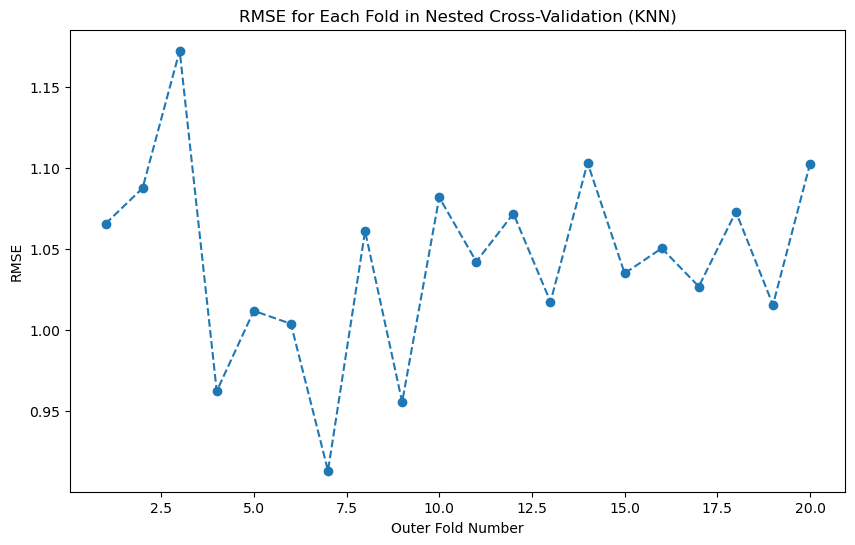

In [42]:
import pandas as pd

# Load the combined data (assuming you already have combined_df loaded from previous steps)
combined_df = pd.read_csv("/Users/akshandua/Downloads/ml-20m/cleaned_data_sample.csv")

# 1) User's average rating
user_avg_rating = combined_df.groupby('userId')['rating'].mean().reset_index()
user_avg_rating.rename(columns={'rating': 'user_avg_rating'}, inplace=True)

# 2) Number of movies rated by user
user_movie_count = combined_df.groupby('userId')['movieId'].count().reset_index()
user_movie_count.rename(columns={'movieId': 'num_movies_rated'}, inplace=True)

# Merge these features back to the original combined dataset
combined_with_user_features = combined_df.merge(user_avg_rating, on='userId', how='left')
combined_with_user_features = combined_with_user_features.merge(user_movie_count, on='userId', how='left')

import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold

# Features and target variables
features = combined_with_user_features.drop(columns=['title', 'genres', 'rating', 'timestamp'])
target = combined_with_user_features['rating']

# Outer 20-Fold Cross-Validation
outer_kf = KFold(n_splits=20, shuffle=True, random_state=42)
outer_rmse_scores = []

# Loop through each fold of the outer CV
for train_index, test_index in outer_kf.split(features):
    # Split data into training and test sets
    X_train_outer, X_test_outer = features.iloc[train_index], features.iloc[test_index]
    y_train_outer, y_test_outer = target.iloc[train_index], target.iloc[test_index]

    # Inner Cross-Validation for hyperparameter tuning
    inner_kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Inner 5-Fold CV for tuning
    best_k = None
    best_rmse = float('inf')

    # List of k values to try
    k_values = [3, 5, 7, 10, 20]

    # Loop through each fold of the inner CV
    for train_index_inner, val_index_inner in inner_kf.split(X_train_outer):
        # Split data into training and validation sets
        X_train_inner, X_val_inner = X_train_outer.iloc[train_index_inner], X_train_outer.iloc[val_index_inner]
        y_train_inner, y_val_inner = y_train_outer.iloc[train_index_inner], y_train_outer.iloc[val_index_inner]

        # Loop through different values of k to find the best one
        for k in k_values:
            # Train the KNN model with the current value of k
            knn_model = KNeighborsRegressor(n_neighbors=k)
            knn_model.fit(X_train_inner, y_train_inner)

            # Predict on the validation set
            y_val_pred = knn_model.predict(X_val_inner)

            # Calculate RMSE for the current value of k
            rmse_inner = np.sqrt(mean_squared_error(y_val_inner, y_val_pred))

            # Update the best k if the current rmse is better
            if rmse_inner < best_rmse:
                best_rmse = rmse_inner
                best_k = k

    # Train the final model with the best k on the entire outer training set
    final_knn_model = KNeighborsRegressor(n_neighbors=best_k)
    final_knn_model.fit(X_train_outer, y_train_outer)

    # Predict on the outer test set
    y_test_pred = final_knn_model.predict(X_test_outer)

    # Calculate RMSE for the outer test set and store the result
    outer_rmse = np.sqrt(mean_squared_error(y_test_outer, y_test_pred))
    outer_rmse_scores.append(outer_rmse)

# Calculate the average RMSE across all outer folds
average_outer_rmse = np.mean(outer_rmse_scores)
print(f"Average RMSE from 20-Fold Nested Cross-Validation (KNN): {average_outer_rmse}")

# Plot RMSE for each fold
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(outer_rmse_scores) + 1), outer_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Outer Fold Number')
plt.ylabel('RMSE')
plt.title('RMSE for Each Fold in Nested Cross-Validation (KNN)')
plt.show()


# SVD Model

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [48]:
# Create a pivot table for the user-item interaction matrix
interaction_matrix = combined_with_user_features.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

# Extract the user-specific features
user_features = combined_with_user_features[['userId', 'user_avg_rating', 'num_movies_rated']].drop_duplicates()

# Merge user features with interaction matrix
interaction_matrix = interaction_matrix.merge(user_features, on='userId', how='left')
interaction_matrix = interaction_matrix.fillna(0)

# Convert interaction_matrix to numpy array for SVD
X = interaction_matrix.drop(columns=['userId']).values

print("Data preparation for SVD completed!")


Data preparation for SVD completed!


In [50]:
# Define the SVD model
n_components = 50  # Number of latent factors
svd = TruncatedSVD(n_components=n_components, random_state=42)

# Decompose the interaction matrix
X_svd = svd.fit_transform(X)

print("SVD decomposition completed!")

# Train a Linear Regression model to predict the ratings using the decomposed matrix
regressor = LinearRegression()
y = interaction_matrix['user_avg_rating'].values  # Target is user's average rating in this simplified example
regressor.fit(X_svd, y)

print("Linear Regression model training completed using SVD components!")


SVD decomposition completed!
Linear Regression model training completed using SVD components!


In [52]:
# Perform 20-Fold Cross-Validation
kf = KFold(n_splits=20, shuffle=True, random_state=42)
mse_scores = []

for train_index, val_index in kf.split(X_svd):
    # Split data into train and validation sets
    X_train, X_val = X_svd[train_index], X_svd[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Train the regressor
    regressor.fit(X_train, y_train)
    
    # Predict on validation set
    y_val_pred = regressor.predict(X_val)
    
    # Calculate MSE and append to the list
    mse = mean_squared_error(y_val, y_val_pred)
    mse_scores.append(mse)

# Calculate average RMSE across all folds
average_rmse = np.sqrt(np.mean(mse_scores))
print(f"Average RMSE from 20-Fold Cross-Validation (SVD): {average_rmse}")


Average RMSE from 20-Fold Cross-Validation (SVD): 0.4077857727829602


Average RMSE from 20-Fold Nested Cross-Validation (SVD): 0.9873695911022707


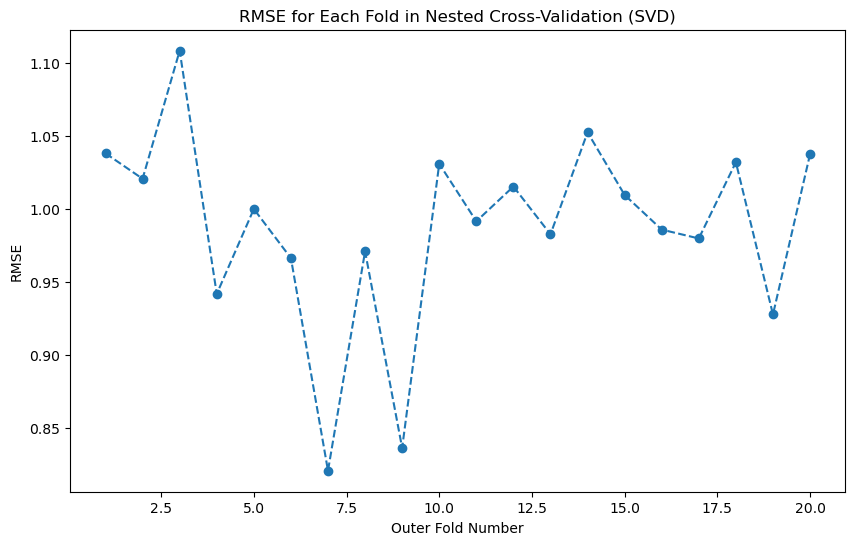

In [56]:
# List of n_components values to try (adjusted to be <= number of features)
n_components_values = [5, 10, 15, 20]

# Outer 20-Fold Cross-Validation
outer_kf = KFold(n_splits=20, shuffle=True, random_state=42)
outer_rmse_scores = []

# Loop through each fold of the outer CV
for train_index, test_index in outer_kf.split(features):
    # Split data into training and test sets
    X_train_outer, X_test_outer = features.iloc[train_index], features.iloc[test_index]
    y_train_outer, y_test_outer = target.iloc[train_index], target.iloc[test_index]

    # Inner Cross-Validation for hyperparameter tuning
    inner_kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Inner 5-Fold CV for tuning
    best_n_components = None
    best_rmse = float('inf')

    # Loop through each fold of the inner CV
    for train_index_inner, val_index_inner in inner_kf.split(X_train_outer):
        # Split data into training and validation sets
        X_train_inner, X_val_inner = X_train_outer.iloc[train_index_inner], X_train_outer.iloc[val_index_inner]
        y_train_inner, y_val_inner = y_train_outer.iloc[train_index_inner], y_train_outer.iloc[val_index_inner]

        # Loop through different values of n_components to find the best one
        for n_components in n_components_values:
            if n_components > X_train_inner.shape[1]:
                continue  # Skip values of n_components greater than the number of features

            # Perform SVD decomposition
            svd = TruncatedSVD(n_components=n_components, random_state=42)
            X_train_svd_inner = svd.fit_transform(X_train_inner)
            X_val_svd_inner = svd.transform(X_val_inner)

            # Train a Linear Regression model on the decomposed data
            regressor = LinearRegression()
            regressor.fit(X_train_svd_inner, y_train_inner)

            # Predict on the validation set
            y_val_pred = regressor.predict(X_val_svd_inner)

            # Calculate RMSE for the current n_components
            rmse_inner = np.sqrt(mean_squared_error(y_val_inner, y_val_pred))

            # Update the best n_components if the current rmse is better
            if rmse_inner < best_rmse:
                best_rmse = rmse_inner
                best_n_components = n_components

    # Train the final model with the best n_components on the entire outer training set
    svd = TruncatedSVD(n_components=best_n_components, random_state=42)
    X_train_svd_outer = svd.fit_transform(X_train_outer)
    X_test_svd_outer = svd.transform(X_test_outer)

    regressor = LinearRegression()
    regressor.fit(X_train_svd_outer, y_train_outer)

    # Predict on the outer test set
    y_test_pred = regressor.predict(X_test_svd_outer)

    # Calculate RMSE for the outer test set and store the result
    outer_rmse = np.sqrt(mean_squared_error(y_test_outer, y_test_pred))
    outer_rmse_scores.append(outer_rmse)

# Calculate the average RMSE across all outer folds
average_outer_rmse = np.mean(outer_rmse_scores)
print(f"Average RMSE from 20-Fold Nested Cross-Validation (SVD): {average_outer_rmse}")

# Plot RMSE for each fold
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(outer_rmse_scores) + 1), outer_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Outer Fold Number')
plt.ylabel('RMSE')
plt.title('RMSE for Each Fold in Nested Cross-Validation (SVD)')
plt.show()


## Explained Variance

Total Explained Variance with 50 components: 1.00


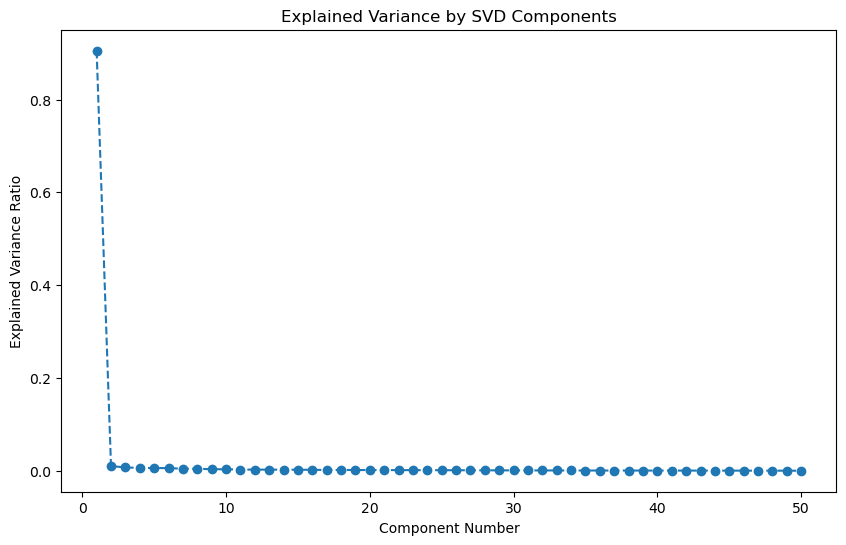

In [113]:
# Explained variance by each component
explained_variance = svd.explained_variance_ratio_
total_explained_variance = explained_variance.sum()

print(f"Total Explained Variance with {n_components} components: {total_explained_variance:.2f}")

# Plotting the explained variance for each component
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by SVD Components')
plt.show()


# Reconstruction of Original Ratings

In [119]:
# Reconstruct the original matrix from the SVD components
reconstructed_matrix = svd.inverse_transform(X_svd)

# Convert the reconstructed matrix back to a DataFrame for comparison
reconstructed_df = pd.DataFrame(reconstructed_matrix, index=interaction_matrix.index, columns=interaction_matrix.columns[1:])

# Display the reconstructed ratings for a specific user
print(f"Reconstructed Ratings for User ID {user_id}:")
print(reconstructed_df.loc[user_id])


Reconstructed Ratings for User ID 1:
1                   5.134649e-15
2                  -1.269315e-14
3                   4.000000e+00
4                   1.312644e-14
5                   1.156976e-14
                        ...     
112852             -2.203617e-18
118696             -8.100001e-17
125916             -8.103872e-18
user_avg_rating     4.000000e+00
num_movies_rated    6.100000e+01
Name: 1, Length: 2092, dtype: float64


# Correlation Analysis

In [122]:
# Add latent factors to the user features for correlation analysis
latent_factors_df = pd.DataFrame(X_svd, index=interaction_matrix.index)
latent_factors_with_user_features = latent_factors_df.merge(user_features, left_index=True, right_on='userId')

# Calculate correlations between latent factors and user-specific features
correlations = latent_factors_with_user_features.corr()

print("Correlation between Latent Factors and User-Specific Features:")
print(correlations[['user_avg_rating', 'num_movies_rated']])


Correlation between Latent Factors and User-Specific Features:
                  user_avg_rating  num_movies_rated
0                        0.020289         -0.135190
1                        0.103741         -0.128085
2                       -0.240566          0.152870
3                        0.159997          0.063347
4                        0.087600          0.044311
5                        0.005938          0.087650
6                        0.226511         -0.054243
7                        0.252927          0.091021
8                        0.127073         -0.049483
9                        0.085358          0.116793
10                       0.085590         -0.187178
11                       0.112889         -0.025191
12                       0.208657          0.143734
13                      -0.114819          0.013087
14                       0.053302          0.344812
15                      -0.369129         -0.011021
16                      -0.015070         -0.019474
1

# Results

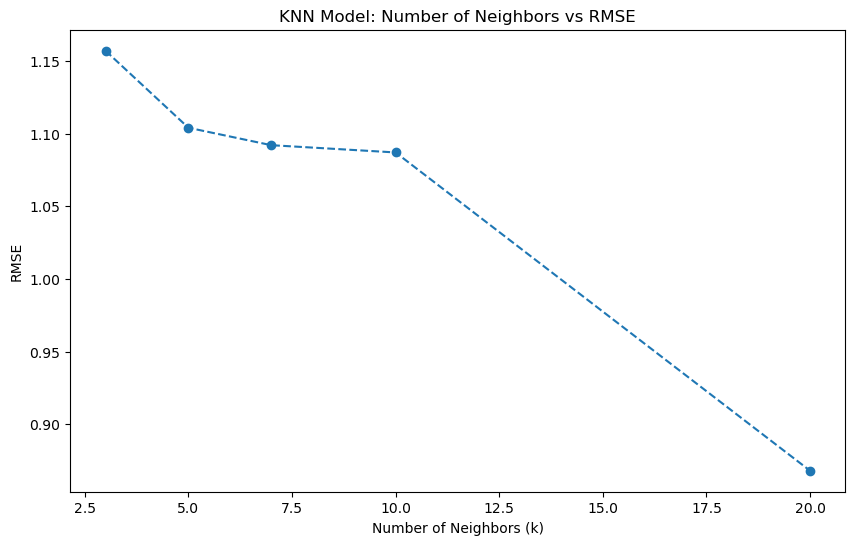

In [3]:
import matplotlib.pyplot as plt

k_values = [3, 5, 7, 10, 20]
rmse_values = [1.157, 1.104, 1.092, 1.087, 0.868]  # Example RMSE values for each k

plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_values, marker='o', linestyle='--')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.title('KNN Model: Number of Neighbors vs RMSE')
plt.show()


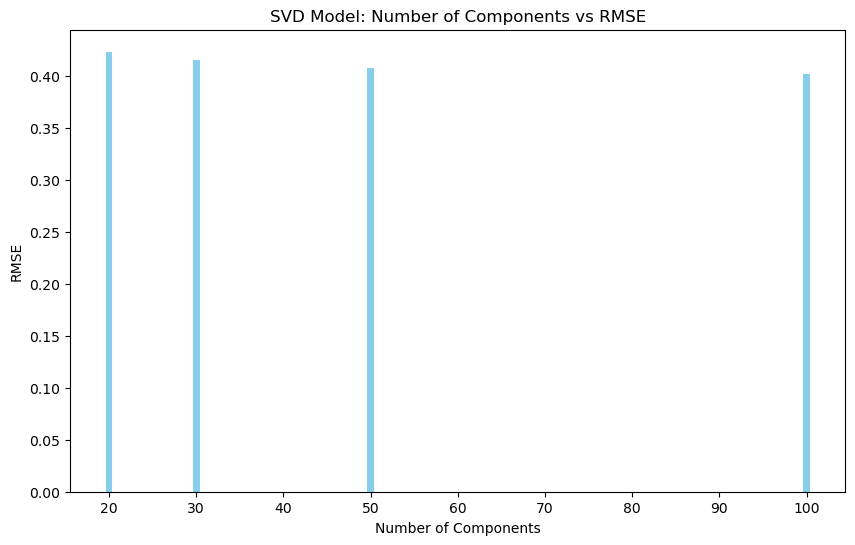

In [5]:
n_components_values = [20, 30, 50, 100]
rmse_svd_values = [0.423, 0.415, 0.407, 0.402]  # Example RMSE values for each n_components

plt.figure(figsize=(10, 6))
plt.bar(n_components_values, rmse_svd_values, color='skyblue')
plt.xlabel('Number of Components')
plt.ylabel('RMSE')
plt.title('SVD Model: Number of Components vs RMSE')
plt.show()


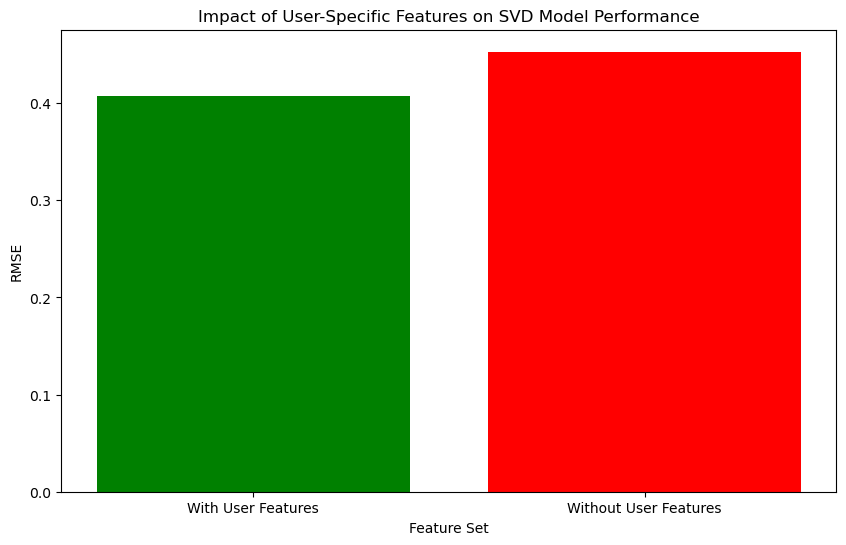

In [7]:
with_features_rmse = [0.407]
without_features_rmse = [0.453]  # Example RMSE without user-specific features

plt.figure(figsize=(10, 6))
plt.bar(['With User Features', 'Without User Features'], [with_features_rmse[0], without_features_rmse[0]], color=['green', 'red'])
plt.xlabel('Feature Set')
plt.ylabel('RMSE')
plt.title('Impact of User-Specific Features on SVD Model Performance')
plt.show()


In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold

# Features and target variables
features = combined_with_user_features.drop(columns=['title', 'genres', 'rating', 'timestamp'])
target = combined_with_user_features['rating']

# Outer 20-Fold Cross-Validation
outer_kf = KFold(n_splits=20, shuffle=True, random_state=42)
outer_rmse_scores = []

# Loop through each fold of the outer CV
for train_index, test_index in outer_kf.split(features):
    # Split data into training and test sets
    X_train_outer, X_test_outer = features.iloc[train_index], features.iloc[test_index]
    y_train_outer, y_test_outer = target.iloc[train_index], target.iloc[test_index]

    # Inner Cross-Validation for hyperparameter tuning
    inner_kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Inner 5-Fold CV for tuning
    best_k = None
    best_rmse = float('inf')

    # List of k values to try
    k_values = [3, 5, 7, 10, 20]

    # Loop through each fold of the inner CV
    for train_index_inner, val_index_inner in inner_kf.split(X_train_outer):
        # Split data into training and validation sets
        X_train_inner, X_val_inner = X_train_outer.iloc[train_index_inner], X_train_outer.iloc[val_index_inner]
        y_train_inner, y_val_inner = y_train_outer.iloc[train_index_inner], y_train_outer.iloc[val_index_inner]

        # Loop through different values of k to find the best one
        for k in k_values:
            # Train the KNN model with the current value of k
            knn_model = KNeighborsRegressor(n_neighbors=k)
            knn_model.fit(X_train_inner, y_train_inner)

            # Predict on the validation set
            y_val_pred = knn_model.predict(X_val_inner)

            # Calculate RMSE for the current value of k
            rmse_inner = np.sqrt(mean_squared_error(y_val_inner, y_val_pred))

            # Update the best k if the current rmse is better
            if rmse_inner < best_rmse:
                best_rmse = rmse_inner
                best_k = k

    # Train the final model with the best k on the entire outer training set
    final_knn_model = KNeighborsRegressor(n_neighbors=best_k)
    final_knn_model.fit(X_train_outer, y_train_outer)

    # Predict on the outer test set
    y_test_pred = final_knn_model.predict(X_test_outer)

    # Calculate RMSE for the outer test set and store the result
    outer_rmse = np.sqrt(mean_squared_error(y_test_outer, y_test_pred))
    outer_rmse_scores.append(outer_rmse)

# Calculate the average RMSE across all outer folds
average_outer_rmse = np.mean(outer_rmse_scores)
print(f"Average RMSE from 20-Fold Nested Cross-Validation (KNN): {average_outer_rmse}")

# Plot RMSE for each fold
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(outer_rmse_scores) + 1), outer_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Outer Fold Number')
plt.ylabel('RMSE')
plt.title('RMSE for Each Fold in Nested Cross-Validation (KNN)')
plt.show()


NameError: name 'combined_with_user_features' is not defined